# Data Mining Final Project
Katherine Atkins

Miryam Ochoa

Elvira Rodriguez

In [1]:
import numpy as np
import pandas as pd
from collections import Counter
import seaborn as sns
from matplotlib import pyplot as plt
%matplotlib inline

This is observational data-what is says about land types and demand for pesticide products. ..dependent on their crops.The dataset contains estimated emissions of 150 active substances at NUTS Level 3 European administrative units. The dataset includes the predicted use of the active substance (kilograms) per region.

EDA and Data Preprocessing

In [2]:
#https://data.jrc.ec.europa.eu/dataset/bf95e015-e041-4882-81fa-f2b283786d5c
data = pd.read_csv('pesticideActiveSubtances.csv')
data.head()

,COUNTRY,NUTS3,Categories_of_products,Chemical_Class_Substance,ID_EUPDB,CAS,CIPAC,Substances_common_names,Arab_KG,Fruit_KG,Oliv_KG,Vines_KG,Grass_KG,Rice_KG,KG_TOT
0,AT,AT111,Other fungicides and bactericides,ANILIDE FUNGICIDES,1040,188425-85-6,673.0,BOSCALID,760.385094,0.0,0.0,223.225551,0.0,0.0,983.610645
1,AT,AT112,Other fungicides and bactericides,ANILIDE FUNGICIDES,1040,188425-85-6,673.0,BOSCALID,2702.234726,0.0,0.0,409.202076,0.0,0.0,3111.436803
2,AT,AT113,Other fungicides and bactericides,ANILIDE FUNGICIDES,1040,188425-85-6,673.0,BOSCALID,1521.092730,0.0,0.0,261.520491,0.0,0.0,1782.613222
3,AT,AT121,Other fungicides and bactericides,ANILIDE FUNGICIDES,1040,188425-85-6,673.0,BOSCALID,2262.038900,0.0,0.0,0.000000,0.0,0.0,2262.038900
4,AT,AT122,Other fungicides and bactericides,ANILIDE FUNGICIDES,1040,188425-85-6,673.0,BOSCALID,702.788789,0.0,0.0,151.433720,0.0,0.0,854.222510


In [3]:
#Count of data in each column
count_per_column = data.count()

# Check for NAs in each column
has_na_per_column = data.isnull().sum()

# Display the results as a pandas dataframe:
stats_df = pd.DataFrame({
    "Num Records": count_per_column,
    "Num NA Values": has_na_per_column
})
print(stats_df)

                          Num Records  Num NA Values
COUNTRY                        205289              0
NUTS3                          205289              0
Categories_of_products         205289              0
Chemical_Class_Substance       205289              0
ID_EUPDB                       205289              0
CAS                            205289              0
CIPAC                          205289              0
Substances_common_names        205289              0
Arab_KG                        205289              0
Fruit_KG                       205289              0
Oliv_KG                        205289              0
Vines_KG                       205289              0
Grass_KG                       205289              0
Rice_KG                        205289              0
KG_TOT                         205289              0


In [4]:
# What is the length of the data?
print("")

# What is the shape of the data?
print(np.shape(data))
print("")

# What is the data type?
print(type(data))
print("")
print(data['COUNTRY'].unique())
print("")

# How many unique countries, categories of products, chemical class substance, or substance common names?
print(data['Categories_of_products'].unique())
print("")
print(data['Chemical_Class_Substance'].unique())
print("")
print(data['Substances_common_names'].unique())


(205289, 15)

<class 'pandas.core.frame.DataFrame'>

['AT' 'BE' 'BG' 'CY' 'CZ' 'DE' 'DK' 'EE' 'EL' 'ES' 'FI' 'FR' 'HR' 'HU'
 'IE' 'IT' 'LT' 'LU' 'LV' 'MT' 'NL' 'NO' 'PL' 'PT' 'RO' 'SE' 'SI' 'SK'
 'UK' '1-' '2-' '3-' '4-' '5-' '6-']

['Other fungicides and bactericides'
 'Fungicides based on carbamates and dithiocarbamates'
 'Fungicides based on morpholines'
 'Fungicides based on imidazoles and triazoles' 'Unclassified fungicides'
 'Fungicides based on benzimidazoles' 'Other herbicides'
 'Herbicides based on dinitroaniline derivatives'
 'Herbicides based on carbamates and bis-carbamates'
 'Herbicides based on derivatives of urea, of uracil or of sulfonylurea'
 'Unclassified herbicides' 'Herbicides based on phenoxy-phytohormones'
 'Herbicides based on amides and anilides'
 'Herbicides based on triazines and triazinones'
 'Unclassified insecticides-acaricides'
 'Insecticides based on pyrethroids'
 'Insecticides based on organophosphates'
 'Insecticides based on carbamates and oxime-carba

In [5]:
# Describe pesticide use in different land covers
data.describe()

,ID_EUPDB,CIPAC,Arab_KG,Fruit_KG,Oliv_KG,Vines_KG,Grass_KG,Rice_KG,KG_TOT
count,205289.000000,205289.000000,205289.000000,2.052890e+05,205289.000000,205289.000000,2.052890e+05,205289.000000,2.052890e+05
mean,1483.866973,479.825586,982.795849,7.132842e+01,18.136260,69.225352,2.495027e+02,0.041030,1.391030e+03
std,334.887105,230.018901,4853.747037,2.847478e+03,509.907901,1495.147680,1.027883e+04,4.531265,1.233575e+04
min,856.000000,2.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000e+00,0.000000,0.000000e+00
25%,1197.000000,332.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000e+00,0.000000,0.000000e+00
50%,1467.000000,494.000000,34.690363,0.000000e+00,0.000000,0.000000,0.000000e+00,0.000000,4.759776e+01
75%,1776.000000,641.202000,369.422052,0.000000e+00,0.000000,0.000000,0.000000e+00,0.000000,4.476794e+02
max,2328.000000,981.000000,194215.234571,1.036757e+06,97265.591281,167984.987403,1.508368e+06,1181.352691,1.537344e+06


In [6]:
# Describe categorical columns (e.g., Categories_of_products)
print(data['Categories_of_products'].describe())
print("")
cat_counts = data['Categories_of_products'].value_counts()
print(cat_counts)

count               205289
unique                  22
top       Other herbicides
freq                 52991
Name: Categories_of_products, dtype: object

Categories_of_products
Other herbicides                                                         52991
Other fungicides and bactericides                                        50313
Herbicides based on derivatives of urea, of uracil or of sulfonylurea    14960
Other insecticides                                                        9520
Fungicides based on imidazoles and triazoles                              9513
Herbicides based on amides and anilides                                   9513
Physiological plant growth regulators                                     6806
Insecticides based on pyrethroids                                         6800
Herbicides based on phenoxy-phytohormones                                 6793
Insecticides based on organophosphates                                    5440
Fungicides based on carbamates and

In [7]:
# define how many unique values are in the substance common name
data['Substances_common_names'].nunique()

150

In [8]:
# define how many countries are in the df
data['COUNTRY'].nunique()

35

In [9]:
# DATA types
print(data.dtypes)

COUNTRY                      object
NUTS3                        object
Categories_of_products       object
Chemical_Class_Substance     object
ID_EUPDB                      int64
CAS                          object
CIPAC                       float64
Substances_common_names      object
Arab_KG                     float64
Fruit_KG                    float64
Oliv_KG                     float64
Vines_KG                    float64
Grass_KG                    float64
Rice_KG                     float64
KG_TOT                      float64
dtype: object


In [10]:
# sum of missing values
print(data.isnull().sum())

COUNTRY                     0
NUTS3                       0
Categories_of_products      0
Chemical_Class_Substance    0
ID_EUPDB                    0
CAS                         0
CIPAC                       0
Substances_common_names     0
Arab_KG                     0
Fruit_KG                    0
Oliv_KG                     0
Vines_KG                    0
Grass_KG                    0
Rice_KG                     0
KG_TOT                      0
dtype: int64


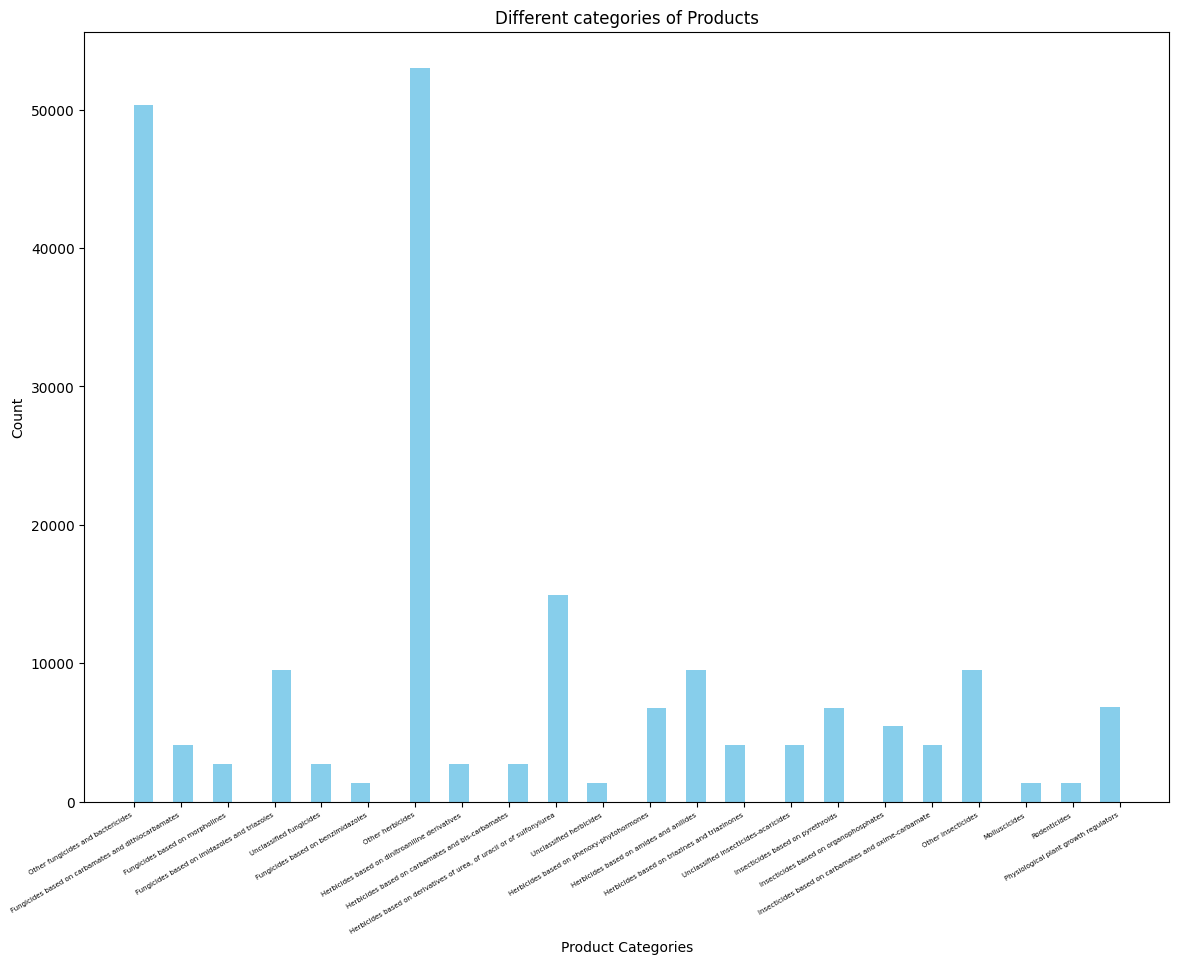

In [11]:
#Deeper look into column "Categories_of_products"

plt.figure(figsize=(14,10))
plt.hist(data['Categories_of_products'], color='skyblue', bins=50)
plt.xlabel('Product Categories')
plt.ylabel('Count')
plt.title('Different categories of Products')
plt.xticks(rotation=30, ha='right', fontsize=5)
plt.savefig('Histogram_Categories_of_products.png', dpi=720)
plt.show()

In [12]:
# columns representing different land use categories
land_use_columns = ['Arab_KG', 'Fruit_KG', 'Oliv_KG', 'Vines_KG', 'Grass_KG', 'Rice_KG']

# Aggregate the data by 'Categories_of_products' and sum the usage for each land use category
land_use_aggregated = data.groupby('Categories_of_products')[land_use_columns].sum()

# Display the aggregated data
land_use_aggregated

,Arab_KG,Fruit_KG,Oliv_KG,Vines_KG,Grass_KG,Rice_KG
Categories_of_products,,,,,,
Fungicides based on benzimidazoles,9.763691e+05,0.000000e+00,0.000000e+00,6.116804e+04,0.000000e+00,0.000000
Fungicides based on carbamates and dithiocarbamates,1.212198e+06,3.321838e+05,0.000000e+00,0.000000e+00,0.000000e+00,0.000000
Fungicides based on imidazoles and triazoles,7.469907e+06,3.665579e+04,0.000000e+00,3.771123e+05,0.000000e+00,0.000000
Fungicides based on morpholines,3.785882e+06,0.000000e+00,0.000000e+00,1.949497e+05,0.000000e+00,0.000000
Herbicides based on amides and anilides,1.964886e+07,7.606437e+04,1.926722e+04,6.511138e+06,0.000000e+00,8423.065614
Herbicides based on carbamates and bis-carbamates,5.077935e+05,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000
"Herbicides based on derivatives of urea, of uracil or of sulfonylurea",1.220346e+07,1.193884e+02,0.000000e+00,0.000000e+00,0.000000e+00,0.000000
Herbicides based on dinitroaniline derivatives,4.862949e+06,1.264840e+05,0.000000e+00,1.422829e+05,0.000000e+00,0.000000
Herbicides based on phenoxy-phytohormones,7.313000e+06,0.000000e+00,2.082958e+05,0.000000e+00,1.224958e+06,0.000000


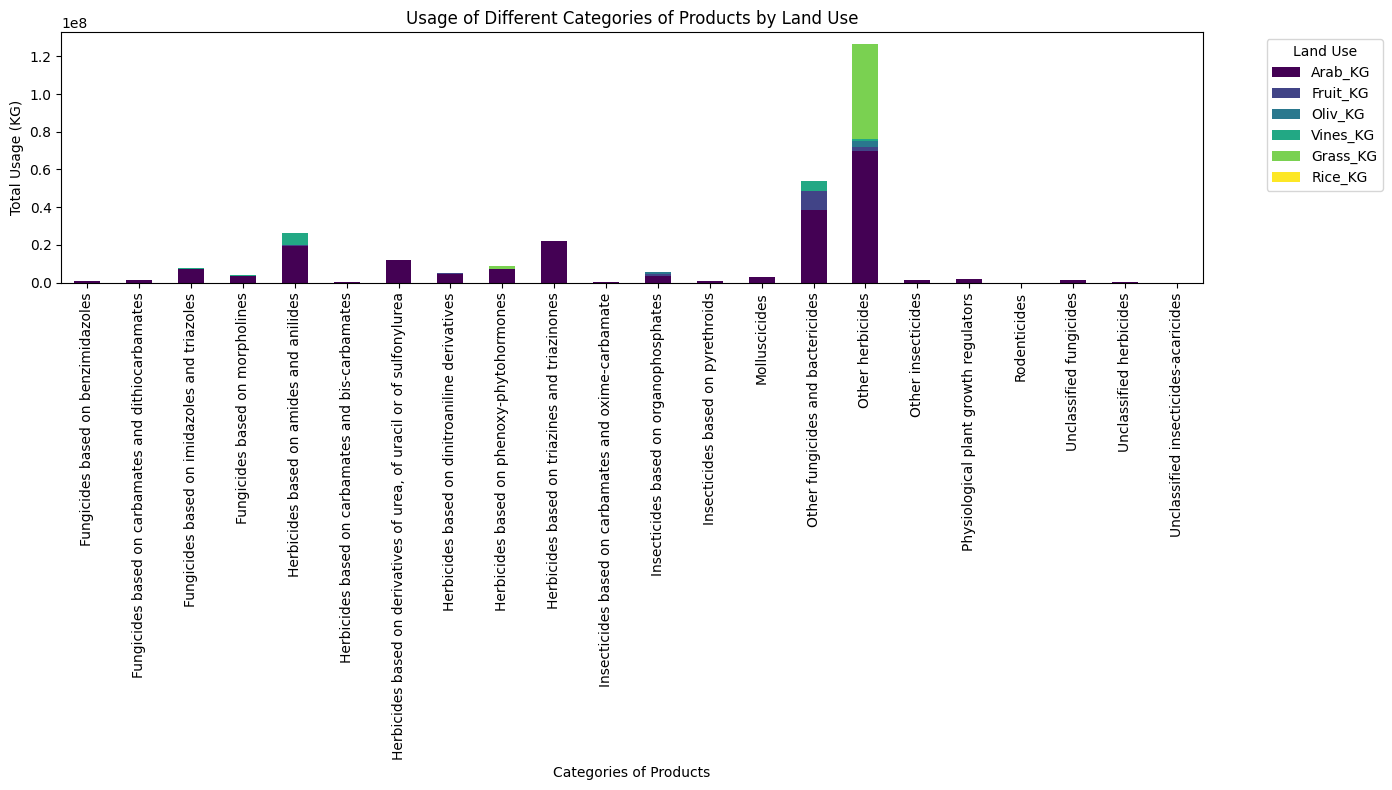

In [13]:
# Plotting the stacked bar chart
land_use_aggregated.plot(kind='bar', stacked=True, figsize=(14, 8), colormap='viridis')

plt.title('Usage of Different Categories of Products by Land Use')
plt.xlabel('Categories of Products')
plt.ylabel('Total Usage (KG)')
plt.xticks(rotation=90)
plt.legend(title='Land Use', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.savefig('Usage_by_land_use.png', dpi=720)
plt.show()

Based on what I can see in the count plots, there is variation in the category and class of pesticide products. The only concern here is how the Substances common name plot has an equal amount of counts for almost all pesticides except for one... FORCHLORFENURON at a of freq 2720.

In [14]:
#Use Counter function to summarize the number of data in each Categories_of_products
from collections import Counter
categories_counts = Counter(data['Categories_of_products'])
categories_counts

Counter({'Other fungicides and bactericides': 50313,
         'Fungicides based on carbamates and dithiocarbamates': 4080,
         'Fungicides based on morpholines': 2720,
         'Fungicides based on imidazoles and triazoles': 9513,
         'Unclassified fungicides': 2720,
         'Fungicides based on benzimidazoles': 1360,
         'Other herbicides': 52991,
         'Herbicides based on dinitroaniline derivatives': 2720,
         'Herbicides based on carbamates and bis-carbamates': 2720,
         'Herbicides based on derivatives of urea, of uracil or of sulfonylurea': 14960,
         'Unclassified herbicides': 1360,
         'Herbicides based on phenoxy-phytohormones': 6793,
         'Herbicides based on amides and anilides': 9513,
         'Herbicides based on triazines and triazinones': 4080,
         'Unclassified insecticides-acaricides': 4080,
         'Insecticides based on pyrethroids': 6800,
         'Insecticides based on organophosphates': 5440,
         'Insecticides 

In [15]:
# convert to a dataframe for display
categories_df = pd.DataFrame(categories_counts.items(), columns=['Pesticide_type', 'Count'])
categories_df

,Pesticide_type,Count
0,Other fungicides and bactericides,50313
1,Fungicides based on carbamates and dithiocarba...,4080
2,Fungicides based on morpholines,2720
3,Fungicides based on imidazoles and triazoles,9513
4,Unclassified fungicides,2720
5,Fungicides based on benzimidazoles,1360
6,Other herbicides,52991
7,Herbicides based on dinitroaniline derivatives,2720
8,Herbicides based on carbamates and bis-carbamates,2720
9,"Herbicides based on derivatives of urea, of ur...",14960


In [16]:
# Group by country and aggregate the emission columns for all six land covers
grouped_by_country = data.groupby('COUNTRY').aggregate({
    'Arab_KG': 'sum',
    'Fruit_KG': 'sum',
    'Oliv_KG': 'sum',
    'Vines_KG': 'sum',
    'Grass_KG': 'sum',
    'Rice_KG': 'sum',
    'KG_TOT': 'sum'
})
grouped_by_country = grouped_by_country.reset_index()
grouped_by_country

,COUNTRY,Arab_KG,Fruit_KG,Oliv_KG,Vines_KG,Grass_KG,Rice_KG,KG_TOT
0,1-,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,0.000000e+00
1,2-,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,0.000000e+00
2,3-,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,0.000000e+00
3,4-,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,0.000000e+00
4,5-,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,0.000000e+00
5,6-,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,0.000000e+00
6,AT,3.497998e+06,2.847050e+03,0.000000e+00,1.927429e+05,3.169703e+05,0.000000,4.010558e+06
7,BE,1.910951e+06,2.708759e+04,0.000000e+00,0.000000e+00,1.476010e+06,0.000000,3.414049e+06
8,BG,7.646728e+06,3.231529e+05,0.000000e+00,1.251163e+06,1.357658e+05,0.000000,9.356809e+06
9,CY,2.354746e+05,4.527398e+04,9.590556e+03,7.196961e+04,5.287454e+05,0.000000,8.910542e+05


In [17]:
#remove unknown COUNTRY ISO code (e.g., 1-, 2-, etc)
grouped_by_country = grouped_by_country.iloc[6:]
grouped_by_country

,COUNTRY,Arab_KG,Fruit_KG,Oliv_KG,Vines_KG,Grass_KG,Rice_KG,KG_TOT
6,AT,3.497998e+06,2.847050e+03,0.000000e+00,1.927429e+05,3.169703e+05,0.000000,4.010558e+06
7,BE,1.910951e+06,2.708759e+04,0.000000e+00,0.000000e+00,1.476010e+06,0.000000,3.414049e+06
8,BG,7.646728e+06,3.231529e+05,0.000000e+00,1.251163e+06,1.357658e+05,0.000000,9.356809e+06
9,CY,2.354746e+05,4.527398e+04,9.590556e+03,7.196961e+04,5.287454e+05,0.000000,8.910542e+05
10,CZ,7.425987e+06,1.774983e+05,0.000000e+00,1.079775e+05,1.535102e+05,0.000000,7.864973e+06
11,DE,2.232227e+07,6.097983e+06,0.000000e+00,1.016157e+06,7.021690e+06,0.000000,3.645810e+07
12,DK,1.651226e+06,9.699657e+03,0.000000e+00,0.000000e+00,5.289290e+05,0.000000,2.189854e+06
13,EE,1.572431e+06,9.865731e+03,0.000000e+00,0.000000e+00,2.562077e+05,0.000000,1.838504e+06
14,EL,4.388279e+06,4.695661e+05,8.792284e+05,9.045001e+05,7.190986e+05,1224.478639,7.361896e+06
15,ES,1.441138e+07,2.120313e+06,9.921197e+05,2.545671e+06,1.585813e+06,1795.684312,2.165709e+07


In [18]:
total_by_country = data.groupby(by="COUNTRY").aggregate({'Arab_KG':'sum','Fruit_KG':'sum','Oliv_KG':'sum',
                                                         'Vines_KG':'sum','Grass_KG':'sum','Rice_KG':'sum'})
total_by_country

,Arab_KG,Fruit_KG,Oliv_KG,Vines_KG,Grass_KG,Rice_KG
COUNTRY,,,,,,
1-,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000
2-,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000
3-,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000
4-,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000
5-,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000
6-,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000
AT,3.497998e+06,2.847050e+03,0.000000e+00,1.927429e+05,3.169703e+05,0.000000
BE,1.910951e+06,2.708759e+04,0.000000e+00,0.000000e+00,1.476010e+06,0.000000
BG,7.646728e+06,3.231529e+05,0.000000e+00,1.251163e+06,1.357658e+05,0.000000


In [19]:
#transform pandas df into numpy array
total_by_country_value = total_by_country.values
total_by_country_value

array([[0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 0.00000000e+00],
       [0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 0.00000000e+00],
       [0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 0.00000000e+00],
       [0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 0.00000000e+00],
       [0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 0.00000000e+00],
       [0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 0.00000000e+00],
       [3.49799819e+06, 2.84704975e+03, 0.00000000e+00, 1.92742881e+05,
        3.16970273e+05, 0.00000000e+00],
       [1.91095142e+06, 2.70875885e+04, 0.00000000e+00, 0.00000000e+00,
        1.47600977e+06, 0.00000000e+00],
       [7.64672816e+06, 3.23152909e+05, 0.00000000e+00, 1.25116263e+06,
        1.35765790e+05, 

In [20]:
#import zscore package from scipy
from scipy import stats
#normalize the data using zscore
total_by_country_value_z = stats.zscore(total_by_country_value)
total_by_country_value_z

array([[-7.12987776e-01, -3.84354257e-01, -3.57228640e-01,
        -5.62266263e-01, -4.47620774e-01, -3.37635343e-01],
       [-7.12987776e-01, -3.84354257e-01, -3.57228640e-01,
        -5.62266263e-01, -4.47620774e-01, -3.37635343e-01],
       [-7.12987776e-01, -3.84354257e-01, -3.57228640e-01,
        -5.62266263e-01, -4.47620774e-01, -3.37635343e-01],
       [-7.12987776e-01, -3.84354257e-01, -3.57228640e-01,
        -5.62266263e-01, -4.47620774e-01, -3.37635343e-01],
       [-7.12987776e-01, -3.84354257e-01, -3.57228640e-01,
        -5.62266263e-01, -4.47620774e-01, -3.37635343e-01],
       [-7.12987776e-01, -3.84354257e-01, -3.57228640e-01,
        -5.62266263e-01, -4.47620774e-01, -3.37635343e-01],
       [-2.80333784e-01, -3.81738686e-01, -3.57228640e-01,
        -2.95360736e-01, -3.50668976e-01, -3.37635343e-01],
       [-4.76629517e-01, -3.59469018e-01, -3.57228640e-01,
        -5.62266263e-01,  3.84680379e-03, -3.37635343e-01],
       [ 2.32806730e-01, -8.74752086e-02, -3.572

# PCA Land types and Countries

In [21]:
#import PCA from sklearn
from sklearn.decomposition import PCA

import mpl_toolkits.mplot3d

In [22]:
names = list(total_by_country.reset_index()['COUNTRY'])
names

['1-',
 '2-',
 '3-',
 '4-',
 '5-',
 '6-',
 'AT',
 'BE',
 'BG',
 'CY',
 'CZ',
 'DE',
 'DK',
 'EE',
 'EL',
 'ES',
 'FI',
 'FR',
 'HR',
 'HU',
 'IE',
 'IT',
 'LT',
 'LU',
 'LV',
 'MT',
 'NL',
 'NO',
 'PL',
 'PT',
 'RO',
 'SE',
 'SI',
 'SK',
 'UK']

In [23]:
#Do PCA
pca= PCA(n_components=3)
pca.fit(total_by_country_value_z)
X_pca=pca.transform(total_by_country_value_z)

In [24]:
X_pca

array([[-1.0804583 , -0.40824035, -0.07549892],
       [-1.0804583 , -0.40824035, -0.07549892],
       [-1.0804583 , -0.40824035, -0.07549892],
       [-1.0804583 , -0.40824035, -0.07549892],
       [-1.0804583 , -0.40824035, -0.07549892],
       [-1.0804583 , -0.40824035, -0.07549892],
       [-0.78632604, -0.15404166, -0.16912283],
       [-0.90071563, -0.13784995,  0.27082467],
       [ 0.19602828,  0.22114561, -0.75480058],
       [-0.957998  , -0.34045917,  0.03644624],
       [-0.63787801,  0.17953764, -0.33934593],
       [ 2.95650888,  4.60844379,  0.05435345],
       [-0.9768421 , -0.24729303,  0.01623929],
       [-0.99723321, -0.27656845, -0.05757148],
       [ 2.19729941, -1.83007382, -0.09499953],
       [ 4.89723539, -0.83838298, -0.85395347],
       [ 0.16458414,  1.35724785,  4.9132525 ],
       [ 2.44535953,  1.14063876, -0.65712558],
       [-0.59644878, -0.41073978,  0.07223885],
       [-0.02772164,  0.3748268 , -0.57373682],
       [-1.03296022, -0.33511601, -0.015

In [25]:
pca.explained_variance_ratio_

array([0.48080788, 0.23387208, 0.14845956])

In [26]:
### sum of variance explained
np.cumsum(pca.explained_variance_ratio_)

array([0.48080788, 0.71467996, 0.86313952])

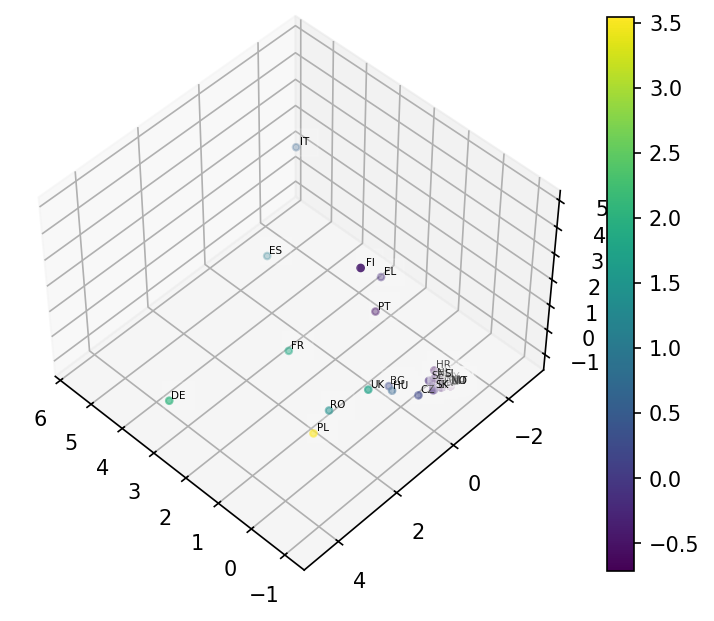

In [27]:
#plot PCA figure and color it according to one of the land cover columns in total_by_country_value_z
from matplotlib import colormaps

#Figure aesthetics provided
plt.figure(dpi=150)
fig = plt.figure(1, figsize=(4, 3))
plt.clf()

ax = fig.add_subplot(111, projection="3d", elev=48, azim=134)
ax.set_position([0, 0, 0.95, 1])
plt.cla()
for i,name in enumerate(names):
    ax.text3D(
        X_pca[i, 0].mean()-0.1,
        X_pca[i, 1].mean()-0.2,
        X_pca[i, 2].mean(),
        name,
        horizontalalignment="center",
        bbox=dict(alpha=0.1, edgecolor="w", facecolor="w"),
        size=5,

    )
plot1=ax.scatter(X_pca[:,0],X_pca[:,1],X_pca[:,2],c=total_by_country_value_z[:,0],cmap='viridis',s=10)
plt.colorbar(plot1)

In [28]:
print("Cumulative variance explained:", np.cumsum(pca.explained_variance_ratio_))


Cumulative variance explained: [0.48080788 0.71467996 0.86313952]


               PC1       PC2       PC3
Feature1  0.328002  0.535880 -0.270783
Feature2  0.356173  0.527136 -0.133505
Feature3  0.485805 -0.431493  0.045240
Feature4  0.491716 -0.026525 -0.243342
Feature5  0.206777  0.289307  0.916229
Feature6  0.494982 -0.405428  0.090085
Explained Variance Ratio: [0.48080788 0.23387208 0.14845956]
Cumulative Variance: [0.48080788 0.71467996 0.86313952]


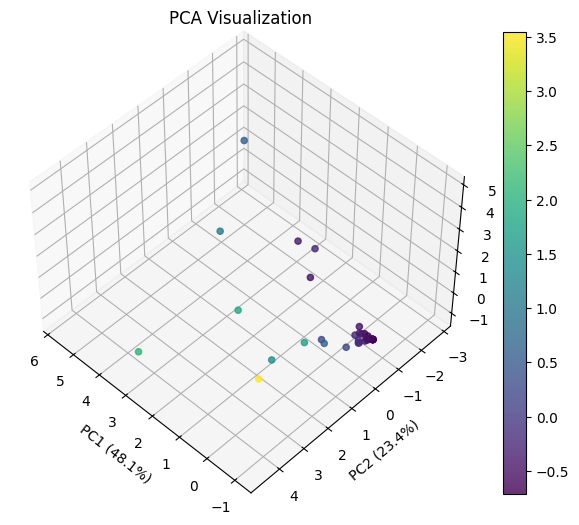

In [29]:
pca = PCA(n_components=3)
X_pca = pca.fit_transform(total_by_country_value_z)

num_features = total_by_country_value_z.shape[1]
feature_indices = [f"Feature{i+1}" for i in range(num_features)]

loadings = pd.DataFrame(
    pca.components_.T,
    columns=["PC1", "PC2", "PC3"],
    index=feature_indices
)
print(loadings)

# Variance Explained
print("Explained Variance Ratio:", pca.explained_variance_ratio_)
print("Cumulative Variance:", np.cumsum(pca.explained_variance_ratio_))

# visualization
fig = plt.figure(figsize=(8, 6))
ax = fig.add_subplot(111, projection="3d", elev=48, azim=134)

plot1 = ax.scatter(
    X_pca[:, 0], X_pca[:, 1], X_pca[:, 2],
    c=total_by_country_value_z[:, 0], cmap='viridis', s=20, alpha=0.8
)

ax.set_xlabel(f"PC1 ({pca.explained_variance_ratio_[0]*100:.1f}%)")
ax.set_ylabel(f"PC2 ({pca.explained_variance_ratio_[1]*100:.1f}%)")
ax.set_zlabel(f"PC3 ({pca.explained_variance_ratio_[2]*100:.1f}%)")
plt.colorbar(plot1)
plt.title("PCA Visualization")
plt.show()

PCA retains 86.31% of the variance with 3 components.
The loadings suggest that Feature6 and Feature5 are particularly influential in defining the principal components.

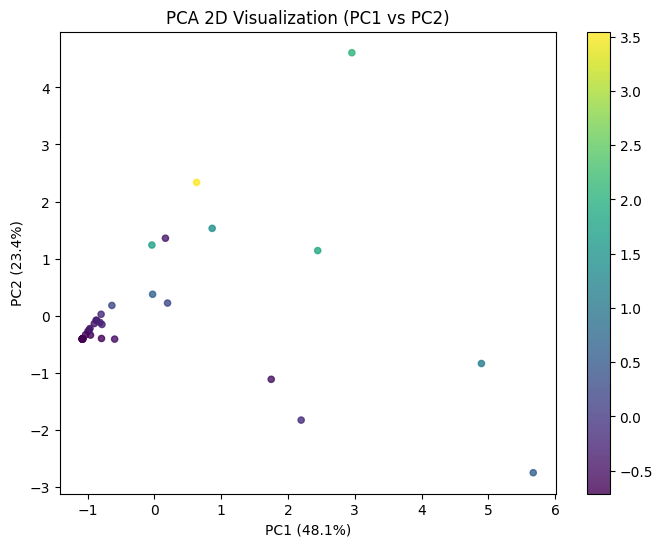

In [30]:
plt.figure(figsize=(8, 6))
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=total_by_country_value_z[:, 0], cmap='viridis', s=20, alpha=0.8)
plt.xlabel(f"PC1 ({pca.explained_variance_ratio_[0]*100:.1f}%)")
plt.ylabel(f"PC2 ({pca.explained_variance_ratio_[1]*100:.1f}%)")
plt.colorbar()
plt.title("PCA 2D Visualization (PC1 vs PC2)")
plt.show()

Lets show this with a map too

In [31]:
import geopandas as gpd
from matplotlib.patches import Patch
from shapely.geometry import Point

#### This was done by Miryam and worked in her script
# Load the shapefile
shape_path = '/content/sample_data/ne_110m_admin_0_countries.shp'
world = gpd.read_file(shape_path)
countries_of_interest =  [
    'Austria', 'Belgium', 'Bulgaria', 'Cyprus', 'Czechia', 'Germany', 'Denmark', 'Estonia',
    'Greece','Spain', 'Finland', 'France', 'Croatia', 'Hungary', 'Ireland', 'Italy',
    'Lithuania', 'Luxembourg', 'Latvia', 'Netherlands', 'Norway', 'Poland',
    'Portugal', 'Romania', 'Sweden', 'Slovenia', 'Slovakia', 'United Kingdom', 'Ukraine', 'Belarus', 'Iceland'
]
europe = world[world['NAME'].isin(countries_of_interest)]
europe = europe.merge(kg_by_country, left_on='NAME', right_on='COUNTRY', how='left')

# Generate a color palette from seaborn
palette = sns.color_palette("Set3", len(countries_of_interest))

# Map the colors to the countries based on the order
europe['color'] = [palette[i] for i in range(len(europe))]

# Plot Europe with specific colors for each country
fig, ax = plt.subplots(1, 1, figsize=(12, 8))

# Plot the geometries with the generated colors
europe.plot(color=europe['color'], ax=ax)

# Create custom legend for countries
legend_labels = [Patch(color=palette[i], label=europe['NAME'].iloc[i]) for i in range(len(europe))]

# Add title
plt.title('Europe with Custom Colors for Each Country', fontsize=15)

# Add legend in the upper left corner
ax.legend(handles=legend_labels, loc='upper left', bbox_to_anchor=(1.05, 1), title="Countries", fontsize=10)


# Show plot
plt.show()

DataSourceError: /content/sample_data/ne_110m_admin_0_countries.shp: No such file or directory

In [ ]:
name_mapping = {
    'DK': 'Denmark',
    'EE': 'Estonia',
    'EL': 'Greece',  #
    'ES': 'Spain',
    'FI': 'Finland',
    'FR': 'France',
    'HR': 'Croatia',
    'HU': 'Hungary',
    'IE': 'Ireland',
    'IT': 'Italy',
    'LT': 'Lithuania',
    'LU': 'Luxembourg',
    'LV': 'Latvia',
    'MT': 'Malta',
    'NL': 'Netherlands',
    'NO': 'Norway',
    'PL': 'Poland',
    'PT': 'Portugal',
    'RO': 'Romania',
    'SE': 'Sweden',
    'SI': 'Slovenia',
    'SK': 'Slovakia',
    'UK': 'United Kingdom'
}
# Rename country codes to full names in kg_by_country
kg_by_country.rename(index=name_mapping, inplace=True)
print(set(countries_of_interest) - set(kg_by_country.index))
# drop 'Germany', 'Cyprus', 'Bulgaria', 'Austria', 'Belgium', 'Belarus', 'Iceland', 'Czechia', 'Ukraine rows from europe
europe = europe[~europe['NAME'].isin(['Germany', 'Cyprus', 'Bulgaria', 'Austria', 'Belgium', 'Belarus', 'Iceland', 'Czechia', 'Ukraine'])]

In [ ]:
missing_data = europe[europe['KG_TOT'].isna()]
print("Missing data for these countries:")
print(missing_data[['SOVEREIGNT','KG_TOT']])

In [ ]:
#fill nans with zero
europe['KG_TOT'] = europe['KG_TOT'].fillna(0)

In [ ]:
urope['centroid'] = europe['geometry'].centroid

# Plot the map with KG_TOT
fig, ax = plt.subplots(figsize=(18, 10))
europe.boundary.plot(ax=ax, linewidth=0.8)  # Plot country boundaries
europe.plot(column='KG_TOT', cmap='plasma', legend=True, ax=ax,
            legend_kwds={'label': "Total KG by Country", 'orientation': 'vertical'})

# Add country labels
for idx, row in europe.iterrows():
    if row['centroid'] and not pd.isna(row['SOVEREIGNT']):
        ax.text(row['centroid'].x, row['centroid'].y, row['SOVEREIGNT'],
                fontsize=6, ha='center', color='black', zorder=5)

plt.title('Total Pesticide Emissions KG')
plt.show()

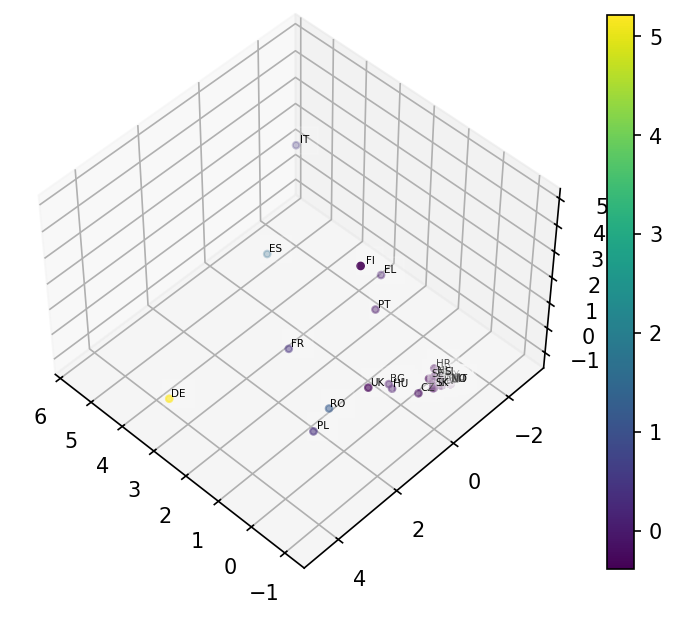

In [32]:
#try another land cover and plot
plt.figure(dpi=150)
fig = plt.figure(1, figsize=(4, 3))
plt.clf()

ax = fig.add_subplot(111, projection="3d", elev=48, azim=134)
ax.set_position([0, 0, 0.95, 1])
plt.cla()
for i,name in enumerate(names):
    ax.text3D(
        X_pca[i, 0].mean()-0.1,
        X_pca[i, 1].mean()-0.2,
        X_pca[i, 2].mean(),
        name,
        horizontalalignment="center",
        bbox=dict(alpha=0.1, edgecolor="w", facecolor="w"),
        size=5,

    )
plot1=ax.scatter(X_pca[:,0],X_pca[:,1],X_pca[:,2],c=total_by_country_value_z[:,1],cmap='viridis',s=10)
plt.colorbar(plot1)


# Model Selection

## K Means Clustering

In [33]:
#import Kmeans from sklearn
from sklearn.cluster import KMeans

In [34]:
#Do k-means clustering
estimator3=KMeans(n_clusters=3)
estimator3.fit(total_by_country_value_z)
labels_k3=estimator3.labels_

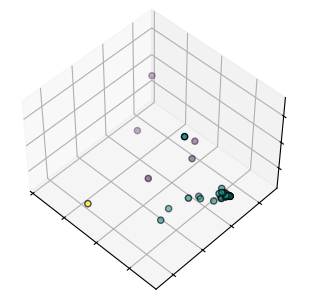

In [35]:
#plot the clustering results and color it according to the cluster labels from k-means
fig = plt.figure(figsize=(10,8))
ax=fig.add_subplot(2,2,1, projection='3d', elev=48,azim=134)
ax.scatter(X_pca[:,0],X_pca[:,1],X_pca[:,2], c=labels_k3, edgecolor="k")
ax.xaxis.set_ticklabels([])
ax.yaxis.set_ticklabels([])
ax.zaxis.set_ticklabels([])

ax.set_xlabel("")
ax.set_ylabel("")
ax.set_zlabel("")
ax.zaxis.labelpad=-10


In [36]:
#Try 4 clusters and plot
estimator4=KMeans(n_clusters=4)
estimator4.fit(total_by_country_value_z)
labels_k4=estimator4.labels_

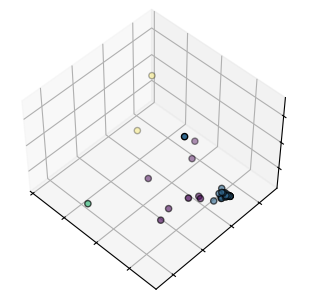

In [37]:
fig = plt.figure(figsize=(10,8))
ax=fig.add_subplot(2,2,1, projection='3d', elev=48,azim=134)
ax.scatter(X_pca[:,0],X_pca[:,1],X_pca[:,2], c=labels_k4, edgecolor="k")
ax.xaxis.set_ticklabels([])
ax.yaxis.set_ticklabels([])
ax.zaxis.set_ticklabels([])

ax.set_xlabel("")
ax.set_ylabel("")
ax.set_zlabel("")
ax.zaxis.labelpad=-10

In [38]:
#Try 5 clusters and plot
estimator5=KMeans(n_clusters=5)
estimator5.fit(total_by_country_value_z)
labels_k5=estimator5.labels_

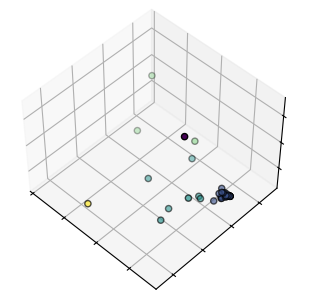

In [39]:
fig = plt.figure(figsize=(10,8))
ax=fig.add_subplot(2,2,1, projection='3d', elev=48,azim=134)
ax.scatter(X_pca[:,0],X_pca[:,1],X_pca[:,2], c=labels_k5, edgecolor="k")
ax.xaxis.set_ticklabels([])
ax.yaxis.set_ticklabels([])
ax.zaxis.set_ticklabels([])

ax.set_xlabel("")
ax.set_ylabel("")
ax.set_zlabel("")
ax.zaxis.labelpad=-10

In [40]:
#Try 8 clusters and plot
estimator8=KMeans(n_clusters=8)
estimator8.fit(total_by_country_value_z)
labels_k8=estimator8.labels_

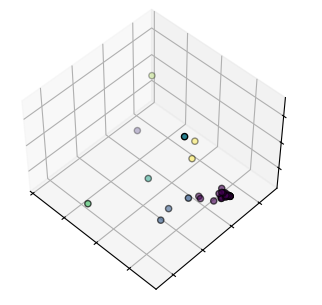

In [41]:
fig = plt.figure(figsize=(10,8))
ax=fig.add_subplot(2,2,1, projection='3d', elev=48,azim=134)
ax.scatter(X_pca[:,0],X_pca[:,1],X_pca[:,2], c=labels_k8, edgecolor="k")
ax.xaxis.set_ticklabels([])
ax.yaxis.set_ticklabels([])
ax.zaxis.set_ticklabels([])

ax.set_xlabel("")
ax.set_ylabel("")
ax.set_zlabel("")
ax.zaxis.labelpad=-10

In [42]:
#Try 2 clusters
estimator2=KMeans(n_clusters=2)
estimator2.fit(total_by_country_value_z)
labels_k2=estimator2.labels_

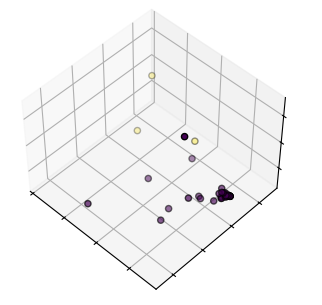

In [43]:
fig = plt.figure(figsize=(10,8))
ax=fig.add_subplot(2,2,1, projection='3d', elev=48,azim=134)
ax.scatter(X_pca[:,0],X_pca[:,1],X_pca[:,2], c=labels_k2, edgecolor="k")
ax.xaxis.set_ticklabels([])
ax.yaxis.set_ticklabels([])
ax.zaxis.set_ticklabels([])

ax.set_xlabel("")
ax.set_ylabel("")
ax.set_zlabel("")
ax.zaxis.labelpad=-10

In [44]:
#Calculate and plot inertia
#k=2,3,4,5,8
inertia_k2=estimator2.inertia_
inertia_k2

138.84151655438464

In [45]:
inertia_k3=estimator3.inertia_
inertia_k3

96.47046166894789

In [46]:
inertia_k4=estimator4.inertia_
inertia_k4

74.37208554791783

In [47]:
inertia_k5=estimator5.inertia_
inertia_k5

42.998426181247005

In [48]:
inertia_k8=estimator8.inertia_
inertia_k8

16.452776038639993

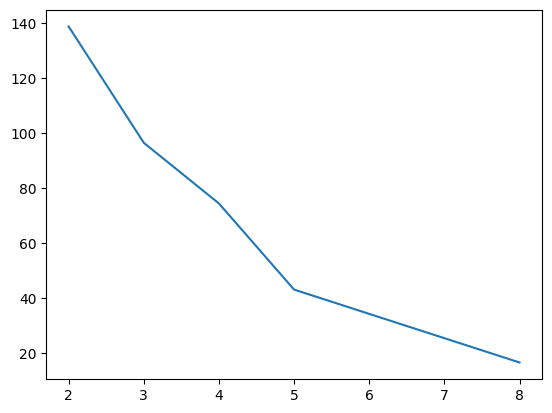

In [49]:
inertia_all=[inertia_k2,inertia_k3,inertia_k4,inertia_k5,inertia_k8]
cluster_all=[2,3,4,5,8]
plt.plot(cluster_all,inertia_all)



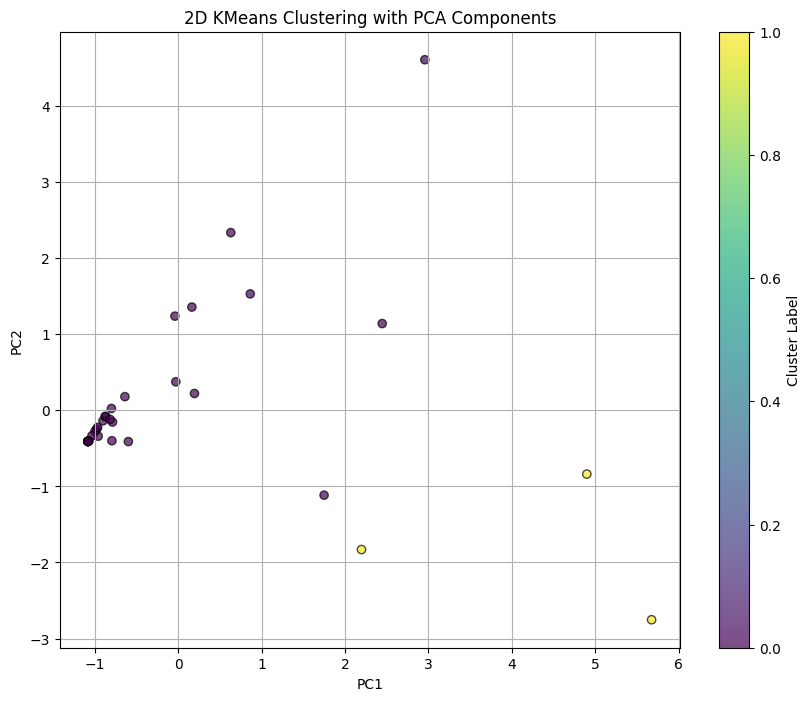

In [50]:
estimator = KMeans(n_clusters=2, random_state=42)
labels= estimator.fit_predict(X_pca)  # Get the cluster labels

#
plt.figure(figsize=(10, 8))
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=labels, cmap='viridis', edgecolor='k', alpha=0.7)
plt.title('2D KMeans Clustering with PCA Components')
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.colorbar(label='Cluster Label')
plt.grid(True)
plt.show()

In [51]:
# silhoutte score
from sklearn.metrics import silhouette_score, silhouette_samples
silhouette_score(X_pca, labels)

0.6441068785910501

## t-SNE

In [52]:
#import TSNE from sklearn
from sklearn.manifold import TSNE
tsne = TSNE(n_components=3)
EUpesticide_data_tsne = tsne.fit_transform(total_by_country_value_z)


In [53]:
EUpesticide_data_tsne

array([[   2.3942165 ,   27.720566  ,  -12.807306  ],
       [   2.3942165 ,   27.720566  ,  -12.807306  ],
       [   2.3942165 ,   27.720566  ,  -12.807306  ],
       [   2.3942165 ,   27.720566  ,  -12.807306  ],
       [   2.3942165 ,   27.720566  ,  -12.807306  ],
       [   2.3942165 ,   27.720566  ,  -12.807306  ],
       [  95.59026   ,    2.0720806 ,  -50.836346  ],
       [   3.9361517 ,  -95.952545  ,  -91.041374  ],
       [  73.33319   ,   31.45081   ,   63.860447  ],
       [  45.719257  ,    4.5377264 , -111.81135   ],
       [ -87.65347   ,   80.94375   ,  -18.188484  ],
       [  25.86186   , -146.75774   ,   -1.0532609 ],
       [  33.53719   ,  -57.09173   ,  -37.892952  ],
       [ -83.366936  ,   35.39207   ,   50.29139   ],
       [  52.930584  ,  109.323906  ,   62.496536  ],
       [ -58.12175   ,  -27.14483   ,  144.14653   ],
       [  84.641884  ,   98.855774  ,  -53.082764  ],
       [  40.981808  , -106.15488   ,   92.43317   ],
       [  45.97406   ,  -16.

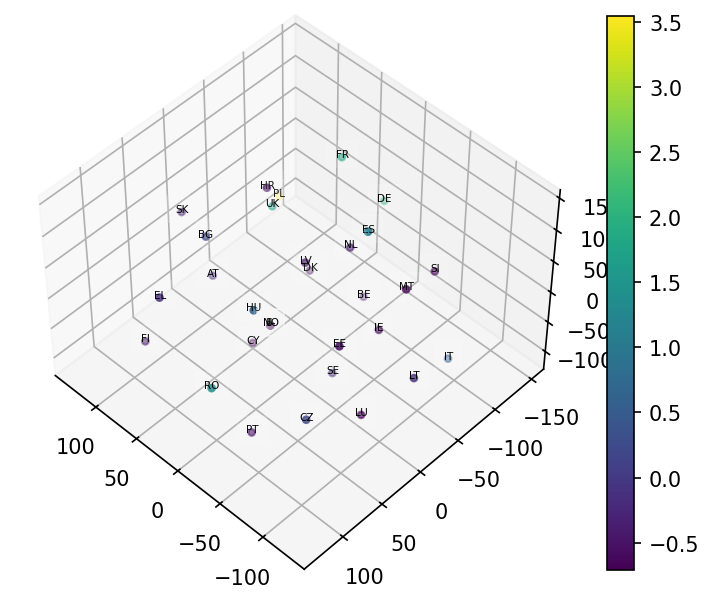

In [54]:
plt.figure(dpi=150)
fig = plt.figure(1, figsize=(4, 3))
plt.clf()

ax = fig.add_subplot(111, projection="3d", elev=48, azim=134)
ax.set_position([0, 0, 0.95, 1])
plt.cla()
for i,name in enumerate(names):
    ax.text3D(
        EUpesticide_data_tsne[i, 0].mean()-0.1,
        EUpesticide_data_tsne[i, 1].mean()-0.2,
        EUpesticide_data_tsne[i, 2].mean(),
        name,
        horizontalalignment="center",
        bbox=dict(alpha=0.1, edgecolor="w", facecolor="w"),
        size=5,

    )
plot1=ax.scatter(EUpesticide_data_tsne[:,0],EUpesticide_data_tsne[:,1],EUpesticide_data_tsne[:,2],c=total_by_country_value_z[:,0],cmap='viridis',s=10)
plt.colorbar(plot1)

<Figure size 960x720 with 0 Axes>

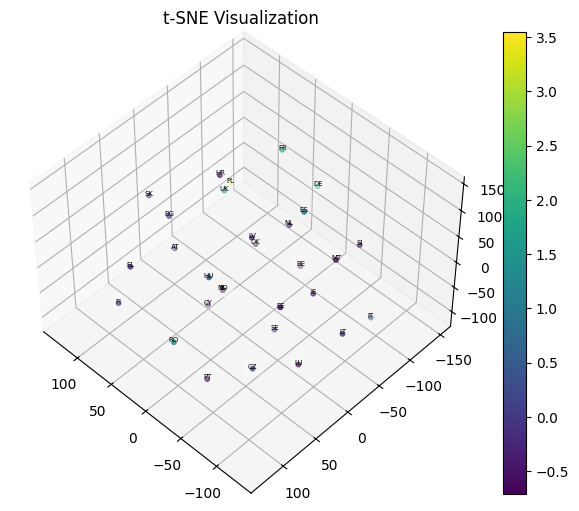

         TSNE1       TSNE2       TSNE3 Country
0     2.394217   27.720566  -12.807306      1-
1     2.394217   27.720566  -12.807306      2-
2     2.394217   27.720566  -12.807306      3-
3     2.394217   27.720566  -12.807306      4-
4     2.394217   27.720566  -12.807306      5-
5     2.394217   27.720566  -12.807306      6-
6    95.590263    2.072081  -50.836346      AT
7     3.936152  -95.952545  -91.041374      BE
8    73.333191   31.450809   63.860447      BG
9    45.719257    4.537726 -111.811348      CY
10  -87.653473   80.943748  -18.188484      CZ
11   25.861860 -146.757736   -1.053261      DE
12   33.537189  -57.091728  -37.892952      DK
13  -83.366936   35.392071   50.291389      EE
14   52.930584  109.323906   62.496536      EL
15  -58.121750  -27.144831  144.146530      ES
16   84.641884   98.855774  -53.082764      FI
17   40.981808 -106.154877   92.433167      FR
18   45.974060  -16.379419  122.325081      HR
19  -25.850464   77.534958   91.079964      HU
20  -58.53226

In [55]:
#test agian for reproducibility
tsne = TSNE(n_components=3, random_state=42)
EUpesticide_data_tsne = tsne.fit_transform(total_by_country_value_z)

#convert t-SNE results to DataFrame for further analysis
tsne_df = pd.DataFrame(EUpesticide_data_tsne, columns=['TSNE1', 'TSNE2', 'TSNE3'])
tsne_df['Country'] = names  # Add identifiers


plt.figure(dpi=150)
fig = plt.figure(figsize=(8, 6))
ax = fig.add_subplot(111, projection="3d", elev=48, azim=134)

plot1 = ax.scatter(EUpesticide_data_tsne[:, 0], EUpesticide_data_tsne[:, 1], EUpesticide_data_tsne[:, 2],
                   c=total_by_country_value_z[:, 0], cmap='viridis', s=10)

for i, name in enumerate(names):
    ax.text3D(EUpesticide_data_tsne[i, 0], EUpesticide_data_tsne[i, 1], EUpesticide_data_tsne[i, 2],
              name, horizontalalignment="center", bbox=dict(alpha=0.1, edgecolor="w", facecolor="w"), size=5)

plt.colorbar(plot1)
plt.title("t-SNE Visualization")
plt.show()

# analyze t-SNE coordinates numerically
print(tsne_df.head(35))


In [56]:

tsne_df['Cluster'] = kmeans.labels_


plt.figure(figsize=(10, 8))
plt.scatter(tsne_df['TSNE1'], tsne_df['TSNE2'], c=tsne_df['Cluster'], cmap='viridis', s=50)
plt.xlabel('TSNE1')
plt.ylabel('TSNE2')
plt.title("t-SNE Plot with K-means Clusters")
plt.colorbar(label="Cluster")
plt.show()


NameError: name 'kmeans' is not defined

In [ ]:
print(tsne_df.describe())


In [ ]:
#### Compare t-sne to k-means clustering

from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters=4, random_state=42)
kmeans_labels = kmeans.fit_predict(total_by_country_value_z)


In [57]:
from sklearn.manifold import TSNE

tsne = TSNE(n_components=3, random_state=42)
tsne_results = tsne.fit_transform(total_by_country_value_z)

In [58]:
tsne_df = pd.DataFrame(tsne_results, columns=['TSNE1', 'TSNE2', 'TSNE3'])
tsne_df['Cluster'] = kmeans_labels

NameError: name 'kmeans_labels' is not defined

KeyError: 'COUNTRY'

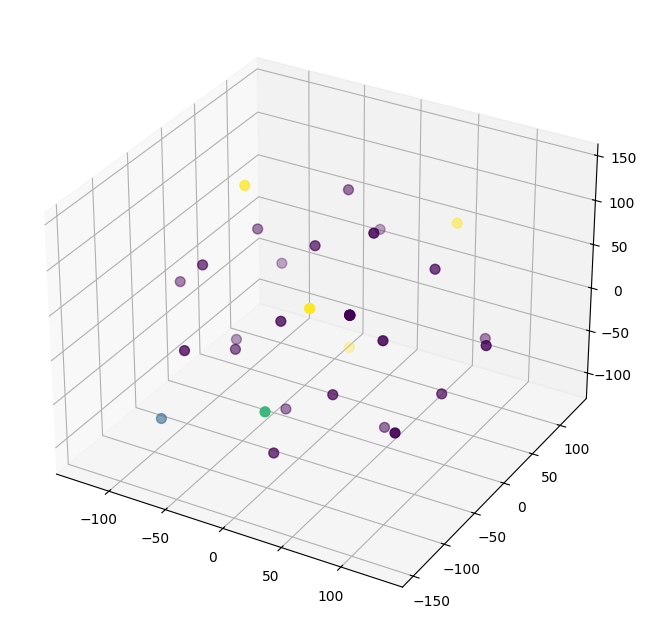

In [59]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters=4, random_state=42)
tsne_df['Cluster'] = kmeans.fit_predict(total_by_country_value_z)

fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')

scatter = ax.scatter(tsne_df['TSNE1'], tsne_df['TSNE2'], tsne_df['TSNE3'],
                     c=tsne_df['Cluster'], cmap='viridis', s=50)

for i, name in enumerate(tsne_df['COUNTRY']):
    ax.text3D(tsne_df['TSNE1'][i], tsne_df['TSNE2'][i], tsne_df['TSNE3'][i],
              name, horizontalalignment='center', bbox=dict(alpha=0.1, edgecolor='w', facecolor='w'), size=7)
ax.set_xlabel('TSNE1')
ax.set_ylabel('TSNE2')
ax.set_zlabel('TSNE3')

plt.colorbar(scatter, label='Cluster')

plt.title('3D t-SNE Plot with K-means Clusters and Labels')

plt.show()

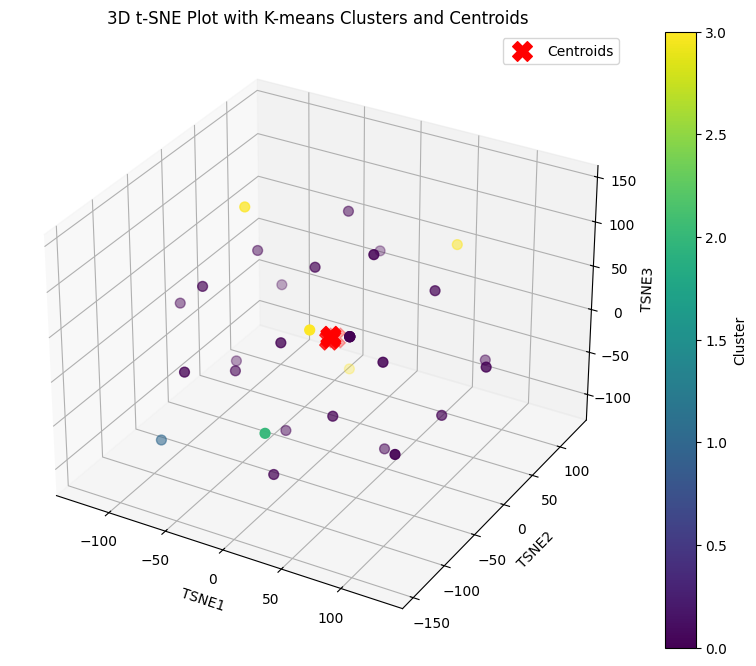

In [60]:
centroids = kmeans.cluster_centers_

fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')

scatter = ax.scatter(tsne_df['TSNE1'], tsne_df['TSNE2'], tsne_df['TSNE3'],
                     c=tsne_df['Cluster'], cmap='viridis', s=50)

ax.scatter(centroids[:, 0], centroids[:, 1], centroids[:, 2], c='red', marker='X', s=200, label='Centroids')

ax.set_xlabel('TSNE1')
ax.set_ylabel('TSNE2')
ax.set_zlabel('TSNE3')
plt.colorbar(scatter, label='Cluster')
plt.legend()

plt.title('3D t-SNE Plot with K-means Clusters and Centroids')

plt.show()

## Silhouette Scores to evaluate and validate

In [61]:
kmeans = KMeans(n_clusters=4, random_state=100)  # Adjust 'n_clusters' as needed
labels = kmeans.fit_predict(X_pca)

Silhouette Score: 0.6508892368165359


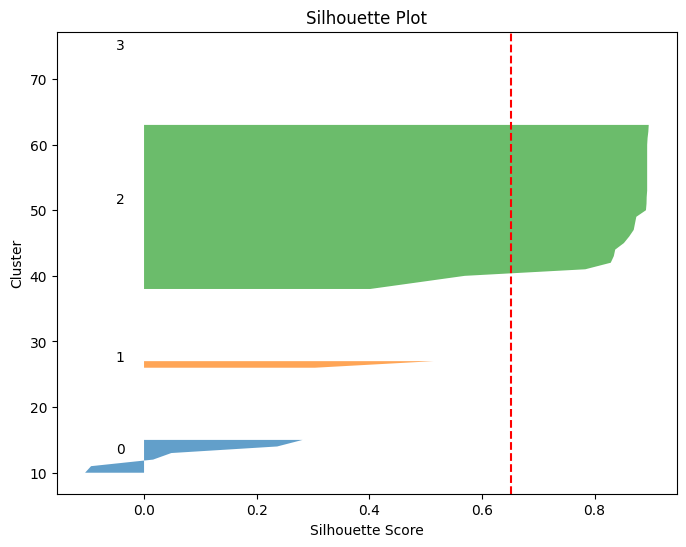

In [62]:
score = silhouette_score(X_pca, labels)
print(f"Silhouette Score: {score}")

sample_scores = silhouette_samples(X_pca, labels)

n_clusters = 4 #testing first with 4 clusters due to elbow curve
y_lower = 10

plt.figure(figsize=(8, 6))
for i in range(n_clusters):
    cluster_scores = sample_scores[labels == i]
    cluster_scores.sort()
    size_cluster = cluster_scores.shape[0]
    y_upper = y_lower + size_cluster
    plt.fill_betweenx(
        np.arange(y_lower, y_upper),
        0,
        cluster_scores,
        alpha=0.7
    )
    plt.text(-0.05, y_lower + 0.5 * size_cluster, str(i))
    y_lower = y_upper + 10  # Add spacing between clusters


plt.axvline(x=score, color="red", linestyle="--")

plt.title("Silhouette Plot")
plt.xlabel("Silhouette Score")
plt.ylabel("Cluster")
plt.show()



In [63]:
for k in range(2, 10):
    kmeans = KMeans(n_clusters=k, random_state=42)
    labels = kmeans.fit_predict(X_pca)
    score = silhouette_score(X_pca, labels)
    print(f"Number of Clusters: {k}, Silhouette Score: {score}")


Number of Clusters: 2, Silhouette Score: 0.6441068785910501
Number of Clusters: 3, Silhouette Score: 0.6574660771128032
Number of Clusters: 4, Silhouette Score: 0.685127190098544
Number of Clusters: 5, Silhouette Score: 0.6124206734880864
Number of Clusters: 6, Silhouette Score: 0.6141127765178388
Number of Clusters: 7, Silhouette Score: 0.6524387538469781
Number of Clusters: 8, Silhouette Score: 0.6195056585183665
Number of Clusters: 9, Silhouette Score: 0.6057668831887891


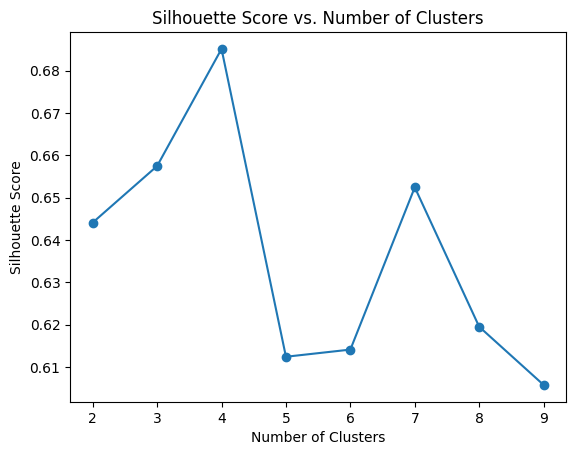

In [64]:
scores = []
cluster_range = range(2, 10)
for k in cluster_range:
    kmeans = KMeans(n_clusters=k, random_state=42)
    labels = kmeans.fit_predict(X_pca)
    scores.append(silhouette_score(X_pca, labels))

plt.plot(cluster_range, scores, marker='o')
plt.xlabel("Number of Clusters")
plt.ylabel("Silhouette Score")
plt.title("Silhouette Score vs. Number of Clusters")
plt.show()
